# Классификация ближайших соседей

В этом примере показано, как использовать . Мы обучаем такой классификатор на наборе данных iris и наблюдаем за разницей граница решения, полученная по параметру weights.

# Загрузка данных
В этом примере мы используем набор данных iris. Мы разбиваем данные на обучение и тестирование набор данных.

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

# K-классификатор ближайших соседей
Мы хотим использовать классификатор k-ближайших соседей с учетом окрестности из 11 данных Точки. Поскольку наша модель k-ближайших соседей использует евклидово расстояние для нахождения Поэтому важно заранее масштабировать данные. См пример под названием Важность масштабирования функций для получения дополнительной информации Подробная информация.

Таким образом, мы используем a для создания цепочки скалера перед тем, как использовать наш классификатор.

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

# Граница принятия решения
Теперь подгоняем два классификатора с разными значениями параметра weights. Мы строим границу решения каждого классификатора, а также исходный dataset, чтобы увидеть разницу.

In [6]:
!pip install --upgrade scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/4e/ba/ce9bd1cd4953336a0e213b29cb80bb11816f2a93de8c99f88ef0b446ad0c/scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB 487.6 kB/s eta 0:00:19
    --------------------------------------- 0.2/9.2 MB 1.1 MB/s eta 0:00:08
   - -------------------------------------- 0.5/9.2 MB 2.6 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/9.2 MB 3.5 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.2 MB 6.0 MB/s eta 0:00:02
   ---------------- ----------------------- 3.9/9.2 MB 12.3 MB/s eta 0:00:01
   --------------------------------- ------ 7.7/9.2 MB 21.2 MB/s eta 0:00:01
   ---------------------------------------  9.2/9.2 MB 24.5 MB/s eta 0:00:01
   ----------------------------

ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'C:\\Users\\German\\anaconda3\\Lib\\site-packages\\~klearn\\datasets\\_svmlight_format_fast.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



Если вы установите weights="uniform", то все соседи будут иметь одинаковый вес при прогнозировании классов. Это означает, что каждый сосед будет иметь одинаковое влияние на прогнозируемый класс.
Если вы установите weights="distance", то вес каждого соседа будет обратно пропорционален его расстоянию до точки, для которой делается прогноз. Это означает, что ближайшие соседи будут иметь больший вес, чем более удаленные соседи.

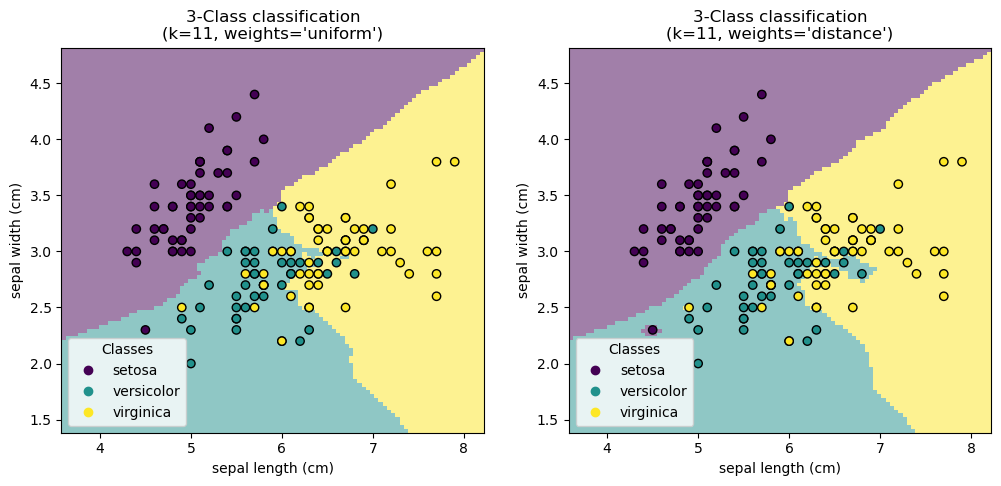

In [7]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

Мы видим, что параметр оказывает влияние на границу решения. Когда все ближайшие соседи будут одинаково влиять на решение. В то время как, когда вес, придаваемый каждому соседу, пропорционален на расстояние, обратное расстоянию от этого соседа до запрашиваемой точки.weightsweights="unifom"weights="distance"

В некоторых случаях учет расстояния может улучшить модель.

In [8]:
# количестов соседей = 3
clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=3))]
)

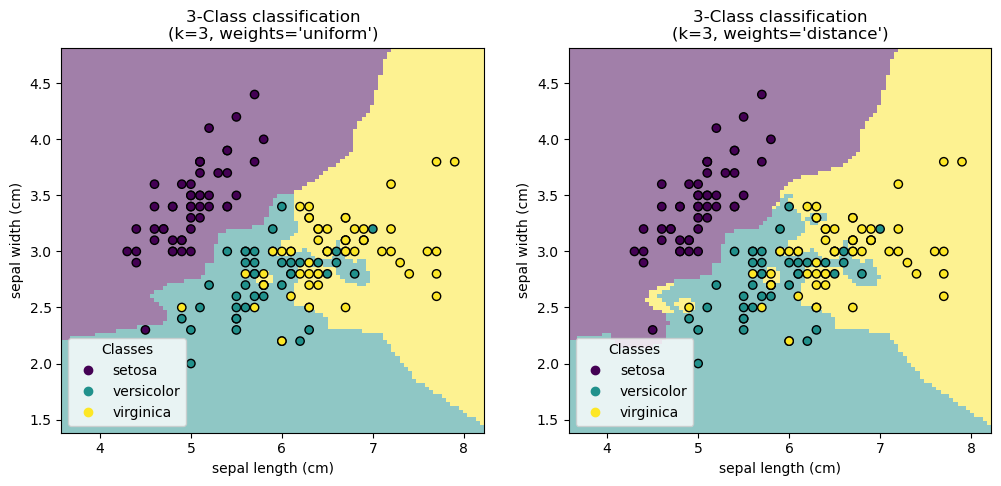

In [9]:
# ncols=2 два графика
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

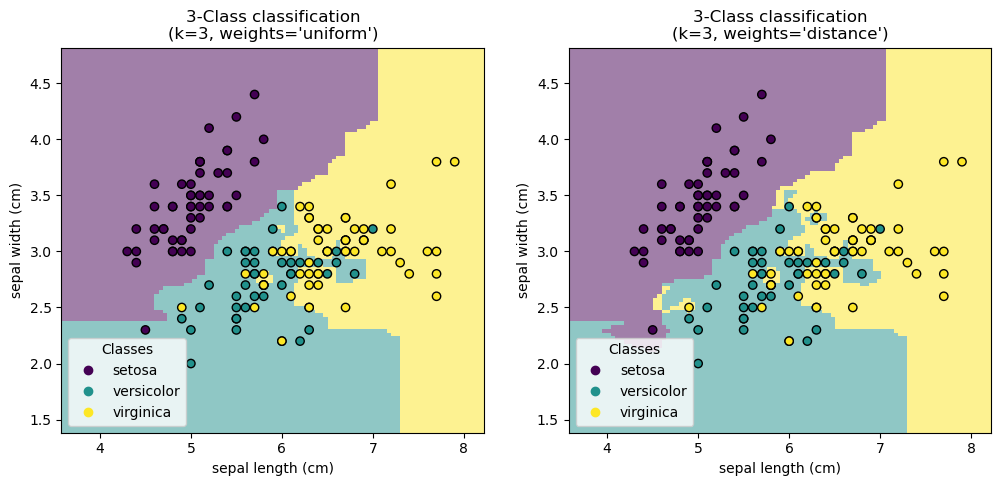

In [10]:
# metric="manhattan" устанавливает метрику расстояния на манхэттенское расстояние. Манхэттенское расстояние
# представляет собой сумму абсолютных разностей между координатами двух точек и часто используется при работе
#  с объектами, которые не являются непрерывными, или когда пространство объектов имеет сетчатую структур
clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=3,metric="manhattan"))]
)
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

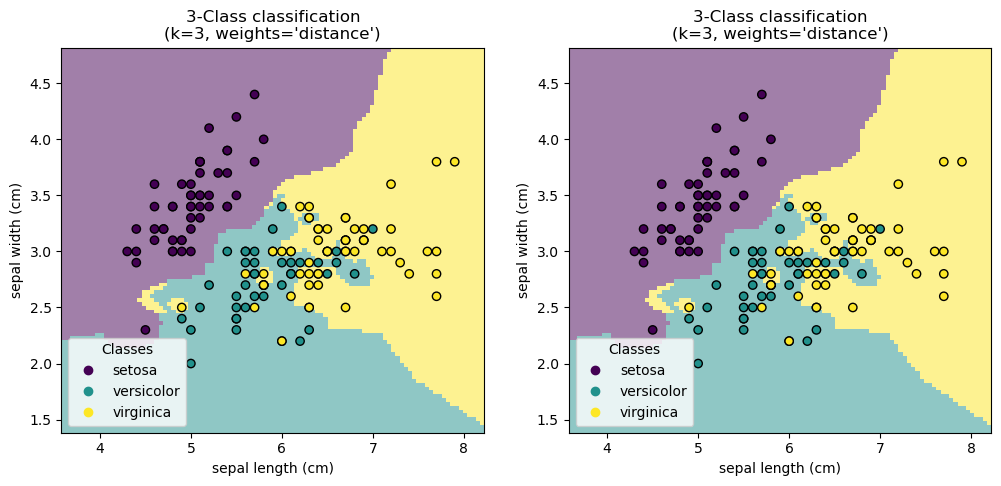

In [11]:
# вес каждого соседа обратно пропорционален его расстоянию до точки В 2 функциях
clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=3))]
)
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("distance","distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()